In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df.shape

(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [9]:
print("Fuel_Type:", df['Fuel_Type'].unique())

Fuel_Type: ['Diesel' 'Petrol' 'CNG']


In [10]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['Fuel_Type_encoded'] = label_encoder.fit_transform(df['Fuel_Type'])

In [11]:
df_clean = df.copy()

Text(0.5, 0, 'Price (EUROs)')

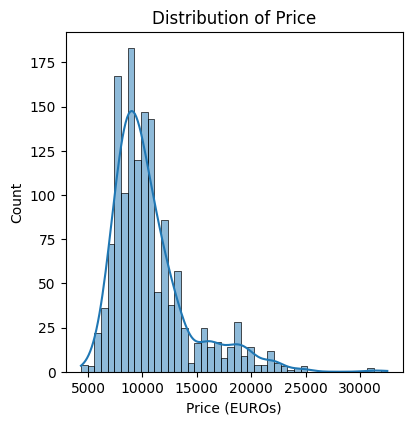

In [12]:
plt.figure(figsize=(20, 15))
# 1. Distribution of target variable
plt.subplot(3, 4, 1)
sns.histplot(df_clean['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (EUROs)')

Text(0.5, 1.0, 'Correlation Heatmap')

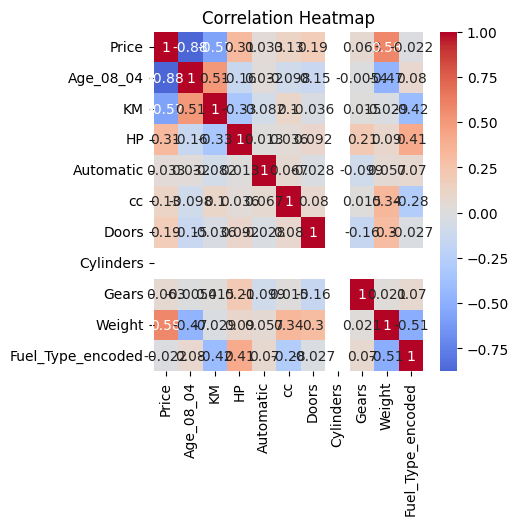

In [14]:
plt.figure(figsize=(20, 15))
# 2. Correlation heatmap
plt.subplot(3, 4, 2)
numeric_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight', 'Fuel_Type_encoded']
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Price vs Age')

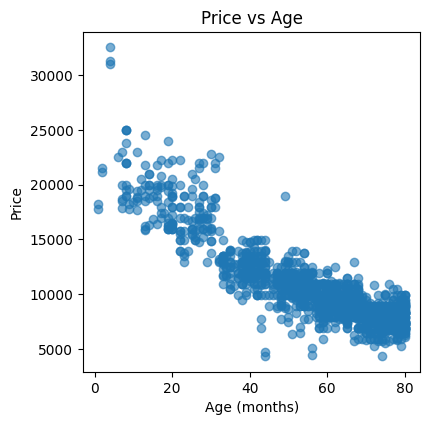

In [15]:
plt.figure(figsize=(20, 15))
# 3. Price vs Age
plt.subplot(3, 4, 3)
plt.scatter(df_clean['Age_08_04'], df_clean['Price'], alpha=0.6)
plt.xlabel('Age (months)')
plt.ylabel('Price')
plt.title('Price vs Age')

Text(0.5, 1.0, 'Price vs Kilometers')

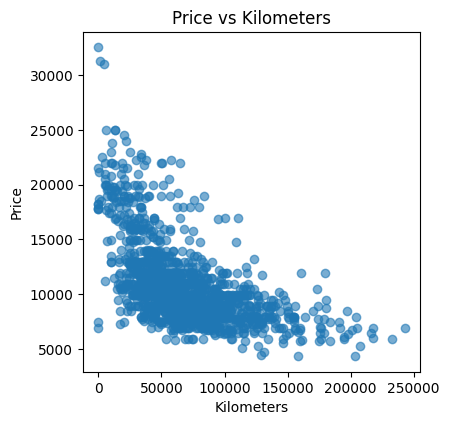

In [16]:
plt.figure(figsize=(20, 15))
# 4. Price vs KM
plt.subplot(3, 4, 4)
plt.scatter(df_clean['KM'], df_clean['Price'], alpha=0.6)
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Price vs Kilometers')

Text(0.5, 1.0, 'Price vs Horse Power')

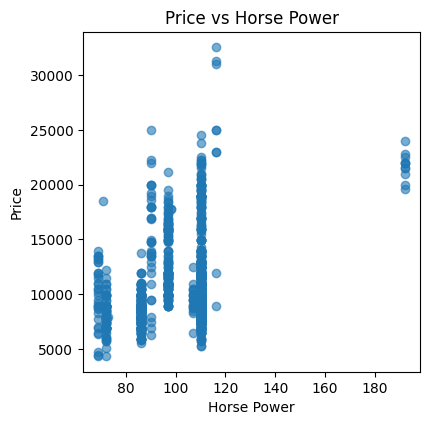

In [17]:
plt.figure(figsize=(20, 15))
# 5. Price vs HP
plt.subplot(3, 4, 5)
plt.scatter(df_clean['HP'], df_clean['Price'], alpha=0.6)
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.title('Price vs Horse Power')

Text(0.5, 1.0, 'Price vs Weight')

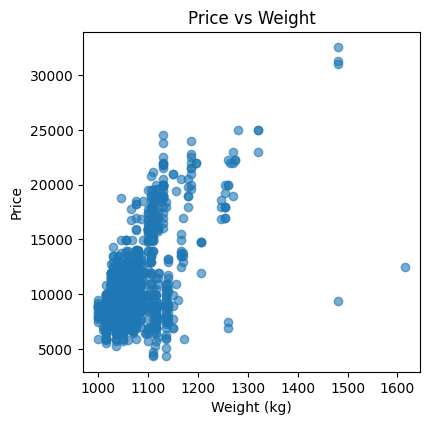

In [18]:
plt.figure(figsize=(20, 15))
# 6. Price vs Weight
plt.subplot(3, 4, 6)
plt.scatter(df_clean['Weight'], df_clean['Price'], alpha=0.6)
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.title('Price vs Weight')

Text(0.5, 1.0, 'Price by Fuel Type')

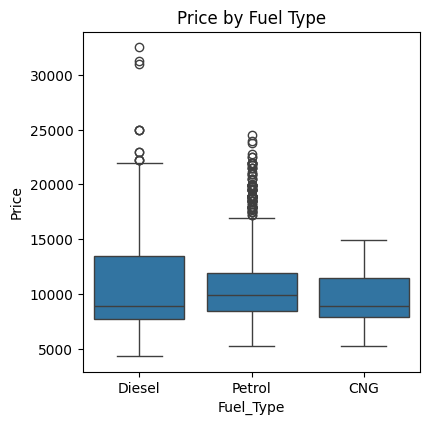

In [19]:
plt.figure(figsize=(20, 15))
# 7. Price by Fuel Type
plt.subplot(3, 4, 7)
sns.boxplot(x='Fuel_Type', y='Price', data=df_clean)
plt.title('Price by Fuel Type')

([<matplotlib.axis.XTick at 0x7cf682636300>,
 [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

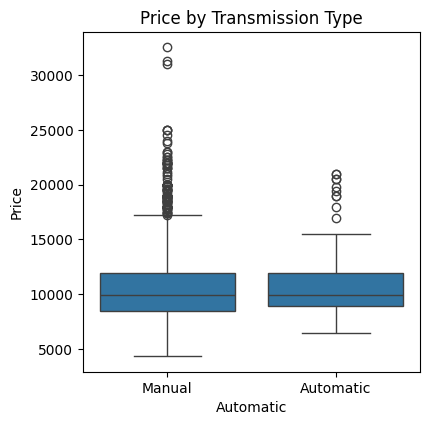

In [20]:
plt.figure(figsize=(20, 15))
# 8. Price by Automatic/Manual
plt.subplot(3, 4, 8)
sns.boxplot(x='Automatic', y='Price', data=df_clean)
plt.title('Price by Transmission Type')
plt.xticks([0, 1], ['Manual', 'Automatic'])

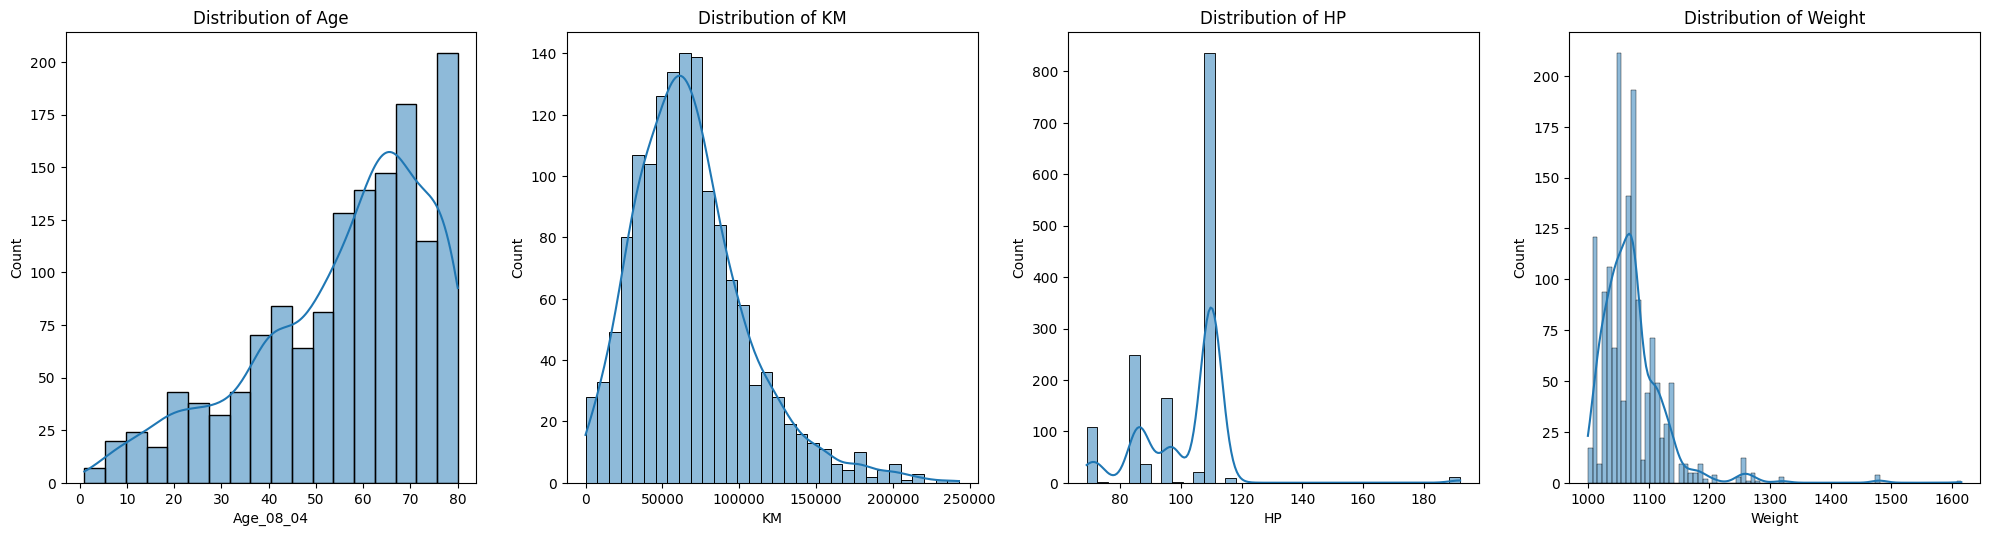

In [21]:
plt.figure(figsize=(20, 15))
# 9. Distribution of numerical features
plt.subplot(3, 4, 9)
sns.histplot(df_clean['Age_08_04'], kde=True)
plt.title('Distribution of Age')

plt.subplot(3, 4, 10)
sns.histplot(df_clean['KM'], kde=True)
plt.title('Distribution of KM')

plt.subplot(3, 4, 11)
sns.histplot(df_clean['HP'], kde=True)
plt.title('Distribution of HP')

plt.subplot(3, 4, 12)
sns.histplot(df_clean['Weight'], kde=True)
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

In [22]:
# Define features and target
X = df_clean[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight', 'Fuel_Type_encoded']]
y = df_clean['Price']

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1148
Testing set size: 288


In [25]:
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [26]:
print("MODEL 1: All Features")
print("Coefficients:")
for feature, coef in zip(X.columns, model1.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model1.intercept_:.4f}")

MODEL 1: All Features
Coefficients:
  Age_08_04: -121.4362
  KM: -0.0169
  HP: 20.6583
  Automatic: 245.1969
  cc: -0.0735
  Doors: -36.2796
  Cylinders: -0.0000
  Gears: 530.2820
  Weight: 23.5106
  Fuel_Type_encoded: 862.0564
Intercept: -12636.2781


In [27]:
# Model 2: Selected features based on correlation (Age, KM, HP, Weight)
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

In [28]:
model2 = LinearRegression()
model2.fit(X_train_sel, y_train)
y_pred2 = model2.predict(X_test_sel)

In [29]:
print("\nMODEL 2: Selected Features (Age, KM, HP, Weight)")
print("Coefficients:")
for feature, coef in zip(selected_features, model2.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model2.intercept_:.4f}")


MODEL 2: Selected Features (Age, KM, HP, Weight)
Coefficients:
  Age_08_04: -120.0254
  KM: -0.0202
  HP: 29.0522
  Weight: 19.7691
Intercept: -5304.9714


In [30]:
# Standardize features for better RFE performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Use RFE to select top 6 features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

In [32]:
model3 = LinearRegression()
model3.fit(X_train_rfe, y_train)
y_pred3 = model3.predict(X_test_rfe)

In [33]:
print("Selected features by RFE:")
selected_mask = rfe.support_
selected_features_rfe = X.columns[selected_mask]
for i, feature in enumerate(selected_features_rfe):
    print(f"  {feature}: Coefficient = {model3.coef_[i]:.4f}")
print(f"Intercept: {model3.intercept_:.4f}")

Selected features by RFE:
  Age_08_04: Coefficient = -2268.7141
  KM: Coefficient = -650.1568
  HP: Coefficient = 300.1127
  Gears: Coefficient = 105.5160
  Weight: Coefficient = 1186.0263
  Fuel_Type_encoded: Coefficient = 340.7122
Intercept: 10754.3955


In [40]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")

    return mse, rmse, mae, r2

In [41]:
# Evaluate all models
metrics1 = evaluate_model(y_test, y_pred1, "Model 1 - All Features")
metrics2 = evaluate_model(y_test, y_pred2, "Model 2 - Selected Features")
metrics3 = evaluate_model(y_test, y_pred3, "Model 3 - RFE Features")


Model 1 - All Features Performance:
Mean Squared Error (MSE): 2096851.14
Root Mean Squared Error (RMSE): 1448.05
Mean Absolute Error (MAE): 992.90
R-squared (R²): 0.8428

Model 2 - Selected Features Performance:
Mean Squared Error (MSE): 1993321.01
Root Mean Squared Error (RMSE): 1411.85
Mean Absolute Error (MAE): 1001.20
R-squared (R²): 0.8506

Model 3 - RFE Features Performance:
Mean Squared Error (MSE): 2104229.83
Root Mean Squared Error (RMSE): 1450.60
Mean Absolute Error (MAE): 997.91
R-squared (R²): 0.8423


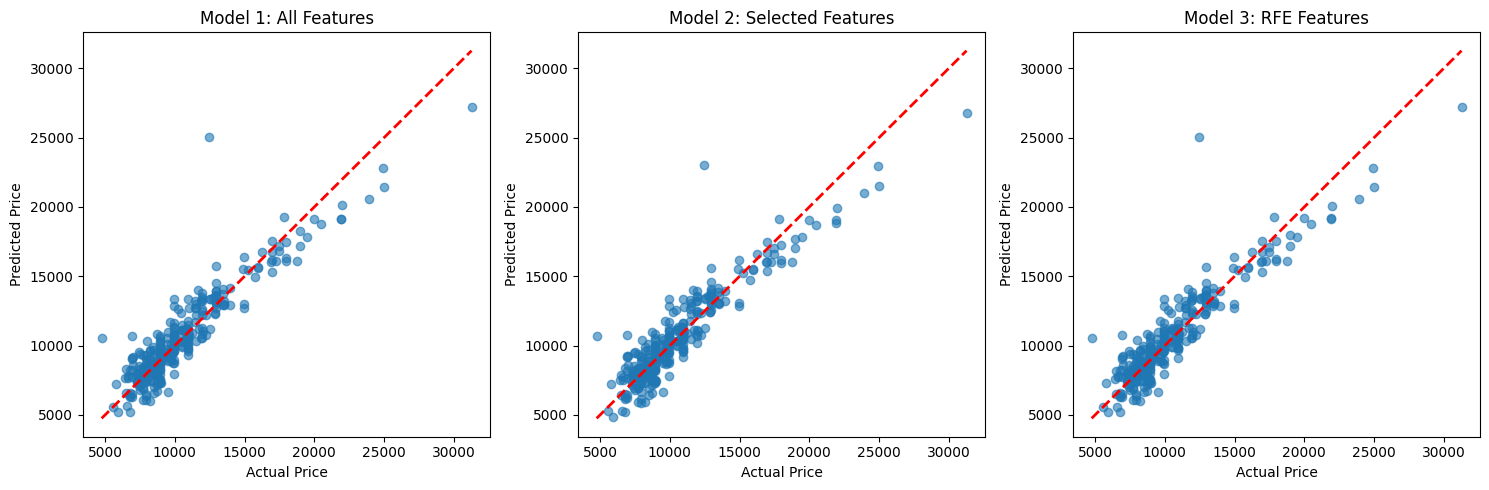

In [42]:
# Visualization of predictions vs actual
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1: All Features')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2: Selected Features')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred3, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 3: RFE Features')

plt.tight_layout()
plt.show()

In [43]:
# Standardize features for regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [45]:
print("LASSO REGRESSION:")
print("Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {lasso.intercept_:.4f}")
metrics_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

LASSO REGRESSION:
Coefficients:
  Age_08_04: -2278.6354
  KM: -638.2164
  HP: 306.5728
  Automatic: 56.5849
  cc: -34.1326
  Doors: -34.4090
  Cylinders: 0.0000
  Gears: 105.0508
  Weight: 1195.7419
  Fuel_Type_encoded: 335.9491
Intercept: 10754.3955

Lasso Regression Performance:
Mean Squared Error (MSE): 2096707.90
Root Mean Squared Error (RMSE): 1448.00
Mean Absolute Error (MAE): 992.91
R-squared (R²): 0.8429


In [46]:
# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [47]:
print("\nRIDGE REGRESSION:")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {ridge.intercept_:.4f}")
metrics_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


RIDGE REGRESSION:
Coefficients:
  Age_08_04: -2276.2527
  KM: -639.4642
  HP: 306.8742
  Automatic: 56.6037
  cc: -34.0020
  Doors: -34.0277
  Cylinders: 0.0000
  Gears: 105.1803
  Weight: 1195.0181
  Fuel_Type_encoded: 334.5740
Intercept: 10754.3955

Ridge Regression Performance:
Mean Squared Error (MSE): 2096174.25
Root Mean Squared Error (RMSE): 1447.82
Mean Absolute Error (MAE): 992.87
R-squared (R²): 0.8429


In [48]:
models_comparison = pd.DataFrame({
    'Model': ['All Features', 'Selected Features', 'RFE Features', 'Lasso', 'Ridge'],
    'R²': [metrics1[3], metrics2[3], metrics3[3], metrics_lasso[3], metrics_ridge[3]],
    'RMSE': [metrics1[1], metrics2[1], metrics3[1], metrics_lasso[1], metrics_ridge[1]],
    'MAE': [metrics1[2], metrics2[2], metrics3[2], metrics_lasso[2], metrics_ridge[2]]
})

In [49]:
print(models_comparison.round(4))

               Model      R²       RMSE        MAE
0       All Features  0.8428  1448.0508   992.8983
1  Selected Features  0.8506  1411.8502  1001.2017
2       RFE Features  0.8423  1450.5964   997.9098
3              Lasso  0.8429  1448.0013   992.9105
4              Ridge  0.8429  1447.8171   992.8660


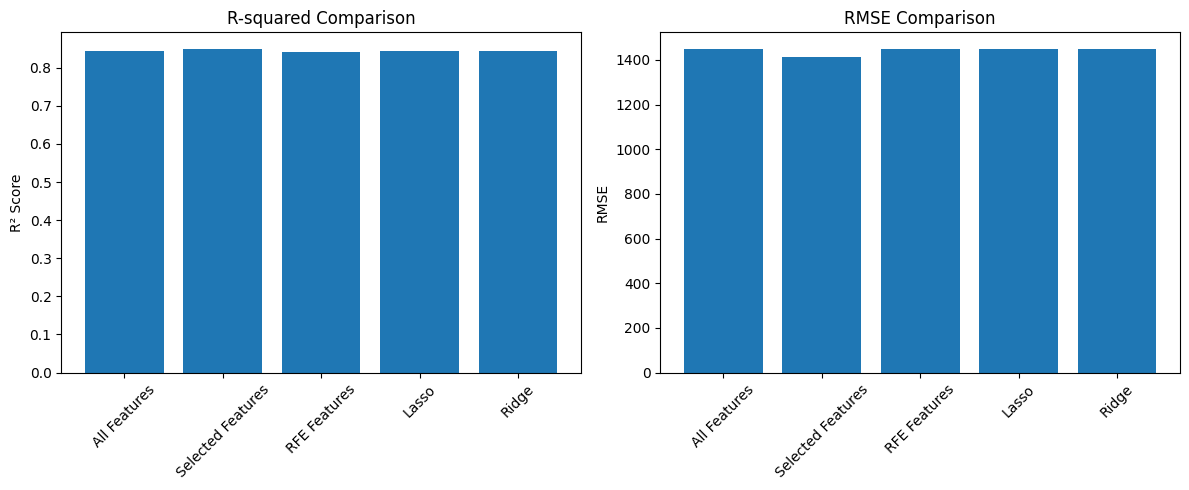

In [50]:
# Visualization of model comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models_comparison['Model'], models_comparison['R²'])
plt.title('R-squared Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.subplot(1, 2, 2)
plt.bar(models_comparison['Model'], models_comparison['RMSE'])
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [52]:
# Residual analysis for the best model
best_model_idx = models_comparison['R²'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
print(f"Best performing model: {best_model_name}")

Best performing model: Selected Features


In [53]:
# Residual plots
if best_model_name == 'All Features':
    residuals = y_test - y_pred1
elif best_model_name == 'Selected Features':
    residuals = y_pred2
elif best_model_name == 'RFE Features':
    residuals = y_pred3
elif best_model_name == 'Lasso':
    residuals = y_pred_lasso
else:
    residuals = y_pred_ridge

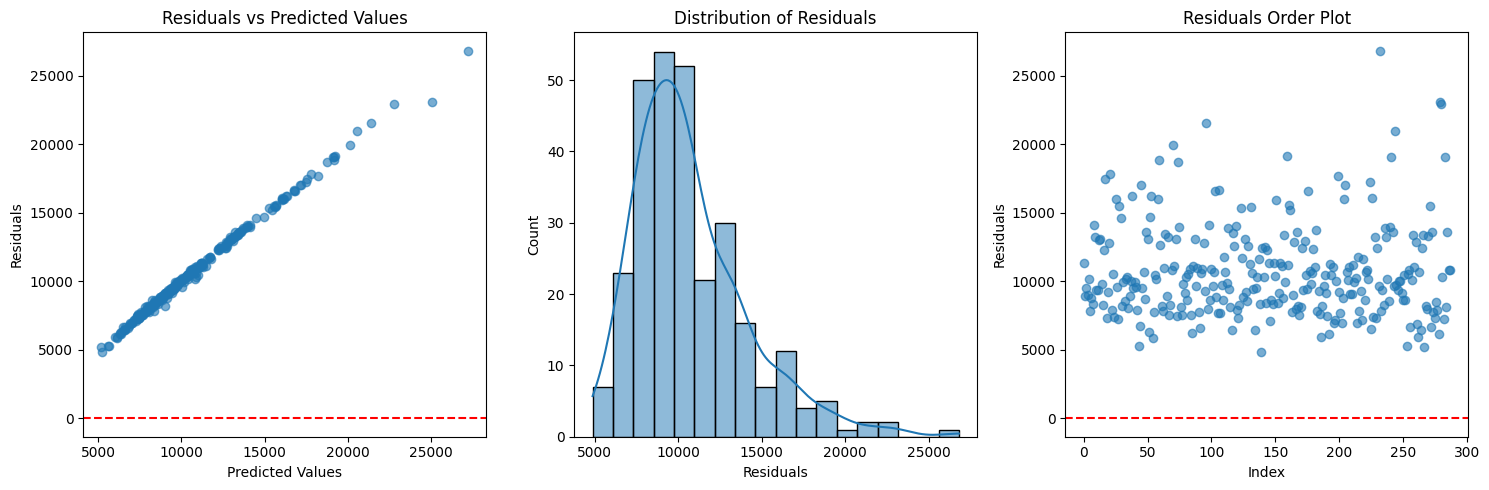

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_pred1, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.subplot(1, 3, 3)
plt.scatter(range(len(residuals)), residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Order Plot')

plt.tight_layout()
plt.show()

# **1. What is Normalization & Standardization and how is it helpful?**

Normalization: Rescales data to a fixed range (usually 0-1). Formula: (x - min)/(max - min)
Standardization: Rescales data to have mean=0 and standard deviation=1. Formula: (x - mean)/std

Helpful for:
- Algorithms that use distance calculations (KNN, SVM, K-means)
- Gradient descent optimization convergence
- Regularization methods (Lasso, Ridge)
- Comparing features on different scales
- Improving model performance and training stability

# **2. What techniques can be used to address multicollinearity in multiple linear regression?**

- Variance Inflation Factor (VIF): Remove features with VIF > 5-10
- Feature Selection: Remove highly correlated features manually
- Principal Component Analysis (PCA): Transform features to orthogonal components
- Regularization: Use Lasso or Ridge regression
- Partial Least Squares (PLS) regression
- Increase sample size
- Combine correlated features into a single feature
- Recursive Feature Elimination (RFE)
